# Entendimento do Negócio

* A Questão de Negócio:
  - Qual a minha meta?
    > Achar o melhor custo benefício para a sua situação
  - Como posso chegar?
    > Escolhendo imóveis que vão de acordo com a sua característica
* Premissas do negocio:
  - Aluguel de no maximo 4000
  - Cidade do Porto
  - Aceita animais
  - 2 ou 3 quartos
  - 16° andar



# Dados

## Setup

In [92]:
# Data Wrangling
import pandas as pd

# Data vizualization
import seaborn as sns

## Dataset

In [93]:
# Carregando a base de dados
df = pd.read_excel("houses_rent.xlsx")
df

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803


## Data Understanding / Data Preparation

In [94]:
# Descricão Estatística dos Dados
df.describe()

,index,area,rooms,bathroom,parking spaces,rent amount,property tax,fire insurance,total
count,6080.00000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,3039.50000,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,1755.28915,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,0.00000,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1519.75000,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,3039.50000,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,4559.25000,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,6079.00000,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


In [95]:
# Verificando dados nulos
df.isna().sum()

index             0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [96]:
# Verificando dados duplicados
df.duplicated().sum()

0

In [97]:
# Visualização dos tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           6080 non-null   int64 
 1   city            6080 non-null   object
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   int64 
 11  property tax    6080 non-null   int64 
 12  fire insurance  6080 non-null   int64 
 13  total           6080 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 665.1+ KB


In [98]:
# Removendo os espacos
df = df.rename(columns={"parking spaces":"parking_spaces", "rent amount":"rent_amount", "property tax":"property_tax", "fire insurance":"fire_insurance"})

In [99]:
# Transformando para float
df = df.astype({"rent_amount":"float", "property_tax":"float", "fire_insurance":"float", "total":"float"})
df.dtypes

index               int64
city               object
area                int64
rooms               int64
bathroom            int64
parking_spaces      int64
floor              object
animal             object
furniture          object
hoa                object
rent_amount       float64
property_tax      float64
fire_insurance    float64
total             float64
dtype: object

In [100]:
df.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000.0,1000.0,121.0,9121.0
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000.0,1417.0,89.0,12680.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200.0,41.0,16.0,1257.0


In [123]:
# Considerando na premissa do negócio, um aluguel de no maximo 4000 reais, que aceita animais e com 2 ou 3 quartos
df = df[(df["total"]<=4000) & (df["animal"]=="accept") & ((df["rooms"]==2)|(df["rooms"]==3))]
df.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [124]:
df.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,3003.132907,100.432836,2.379531,1.653873,1.212509,1964.006397,95.678749,25.899787,2556.358209
std,1739.608911,340.999109,0.485443,0.745034,0.973862,692.152422,107.359160,11.078694,783.028975
min,1.000000,30.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1453.000000,60.000000,2.000000,1.000000,1.000000,1445.500000,1.500000,17.000000,1962.500000
50%,3001.000000,76.000000,2.000000,2.000000,1.000000,1900.000000,67.000000,25.000000,2507.000000
75%,4518.500000,100.000000,3.000000,2.000000,2.000000,2450.000000,144.000000,32.000000,3181.500000
max,6079.000000,12732.000000,3.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,3998.000000


In [125]:
# Calculando a média de preco por cidade
agg_city_price = df.groupby(["city"])["total"].agg("mean").reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


In [126]:
# Observando a média dos valores pelo número de quartos e banheiros
agg_bath_room_price = df.groupby(["bathroom","rooms"])["total"].agg("mean").reset_index()
agg_bath_room_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


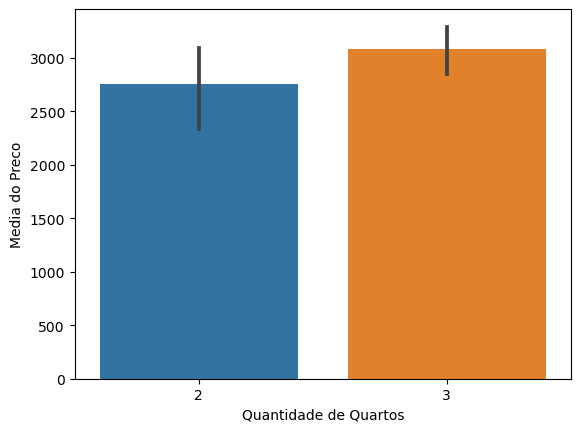

In [127]:
ax = sns.barplot(data=agg_bath_room_price, x="rooms", y="total").set(xlabel = "Quantidade de Quartos", ylabel = "Media do Preco")

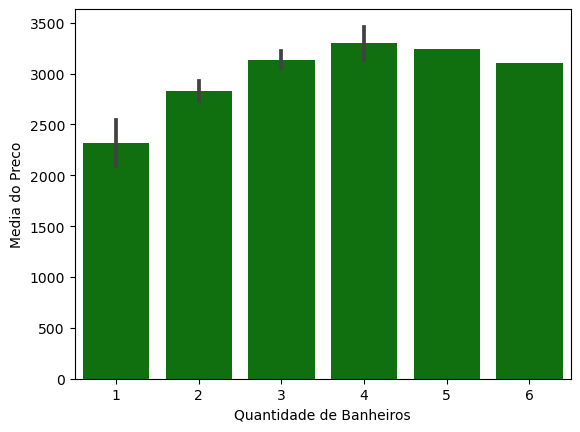

In [128]:
ax = sns.barplot(data=agg_bath_room_price, x="bathroom", y="total", color = "green");
ax.set(xlabel = "Quantidade de Banheiros", ylabel = "Media do Preco");

Como observado, a tendencia é ter um valor maior do imovel conforme aumentam o numero dos quartos e dos banheiros

In [129]:
# Considerando uma area maxima de 100m²
agg_area = df[["area"]].query("area <= 100")

In [130]:
agg_area.describe()

,area
count,1064.000000
mean,69.641917
std,15.962461
min,30.000000
25%,57.000000
50%,69.000000
75%,80.000000
max,100.000000


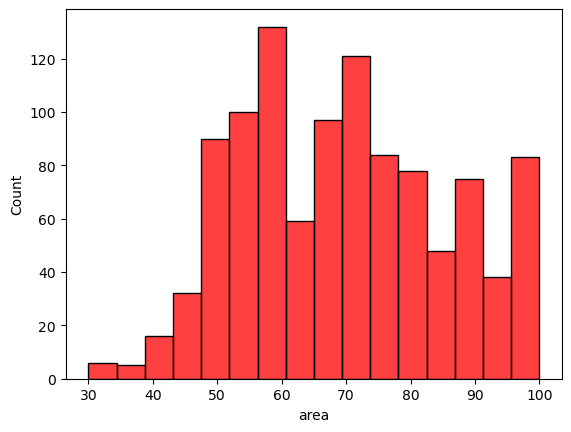

In [131]:
sns.histplot(data=agg_area, x= "area", color = "red");

In [132]:
df

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058,6058,Barcelona,72,2,1,1,4,accept,not furnished,860,1440.0,0.0,19.0,2319.0
6059,6059,Barcelona,59,2,1,1,10,accept,not furnished,589,1500.0,0.0,20.0,2109.0
6065,6065,Barcelona,133,2,2,1,7,accept,not furnished,813,2713.0,160.0,35.0,3721.0
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150.0,0.0,15.0,1585.0


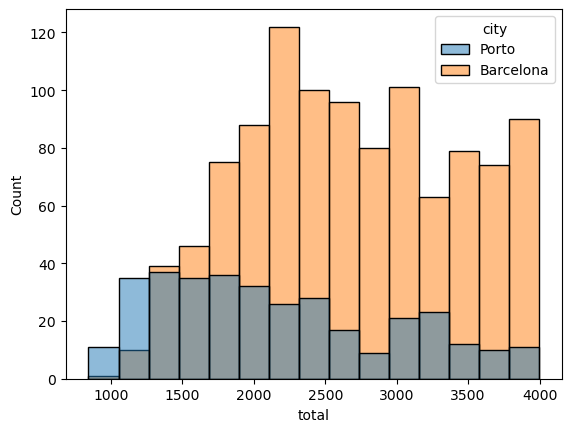

In [133]:
# Comparacao de imoveis disponiveis por preco entre Porto e Barcelona
sns.histplot(data = df, x="total", hue = "city");

In [134]:
# Tomando como premissa a cidade do Porto
df = df.query("city == 'Porto'")
df.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


In [137]:
# Observando o preco por andar dos apartamentos
agg_floor_price = df.groupby("floor")["total"].agg("mean").reset_index()
agg_floor_price

,floor,total
0,1,2004.096154
1,2,1745.322581
2,3,1709.921569
3,4,1872.923077
4,5,2385.812500
5,6,2331.307692
6,7,2340.750000
7,8,2744.714286
8,9,2941.111111
9,10,1946.666667


In [138]:
# Escolhendo um apartamento no 16 andar
sixteenth_floor = df.query("floor == 16")
sixteenth_floor.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0


# Interpretação

Com as premissas do negócio sendo:
 - Aluguel de no maximo 4000
 - Cidade do Porto
 - Aceita animais
 - 2 ou 3 quartos
 - 16° andar

Temos como opcao dois imoveis que atendem todos os requisitos